# 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = [u'SimHei']
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# 数据查看

In [2]:
df=pd.read_excel('C题数据.xlsx')
df3 = pd.read_excel('C题数据.xlsx', sheet_name='data3')

In [11]:
df.head(5)

,组号,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
0,1.0,1#,1.715,93.52,77.84,8.130,4.967,777.10,800,40,0.00
1,NaN,2#,2.810,96.28,83.20,7.533,19.967,1019.67,800,40,36.44
2,2.0,1#,1.830,93.93,86.23,10.470,1.933,795.57,900,40,0.00
3,NaN,2#,2.910,96.41,86.65,7.200,24.967,968.63,900,40,24.74
4,3.0,1#,1.890,94.12,82.12,11.870,4.300,564.93,1000,40,0.00


In [12]:
df.describe()

,组号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
count,25.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,13.000000,2.063100,94.105200,83.032200,26.970860,42.189360,384.869200,1000.000000,30.000000,11.517800
std,7.359801,0.722226,2.387573,8.085928,15.743696,23.166188,215.611906,142.857143,7.142857,14.174552
min,1.000000,0.870000,87.230000,43.910000,7.200000,1.733000,137.170000,800.000000,20.000000,0.000000
25%,7.000000,1.542500,92.887500,80.700000,14.592750,23.366500,234.265000,900.000000,25.000000,0.000000
50%,13.000000,1.992500,94.530000,83.575000,22.601500,42.033000,317.480000,1000.000000,30.000000,1.250000
75%,19.000000,2.675000,96.170000,87.475000,33.925000,60.141500,477.520000,1100.000000,35.000000,21.242500
max,25.000000,3.845000,97.300000,94.590000,65.770000,86.967000,1019.670000,1200.000000,40.000000,50.870000


In [13]:
df=df.drop ('组号',axis=1)

In [14]:
before=df[df['编号']=='1#']
after=df[df['编号']=='2#']

In [15]:
before.head(5)
after.head(5)

,编号,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
1,2#,2.810,96.28,83.20,7.533,19.967,1019.67,800,40,36.44
3,2#,2.910,96.41,86.65,7.200,24.967,968.63,900,40,24.74
5,2#,3.425,96.95,94.33,10.133,34.600,643.40,1000,40,31.45
7,2#,3.400,96.93,82.88,10.600,33.900,603.17,1100,40,19.37
9,2#,3.845,97.30,75.97,15.700,54.500,405.83,1200,40,31.19


# 问题一

## 问题一 （1）

### 正太性检验

In [16]:
stats.shapiro(before.iloc[:,1:7]),stats.shapiro(after.iloc[:,1:7])

(ShapiroResult(statistic=0.6339232325553894, pvalue=9.048922458689145e-18),
 ShapiroResult(statistic=0.6008937358856201, pvalue=1.6414745783430917e-18))

### 显著性检验

In [17]:
stats.ttest_rel(before.iloc[:,1:7], after.iloc[:,1:7])

Ttest_relResult(statistic=array([-15.60666456, -11.3058795 ,  -3.22149848,   7.86637779,
        -7.69570709,  -5.65103971]), pvalue=array([4.56469965e-14, 4.24695109e-11, 3.64573667e-03, 4.24667487e-08,
       6.22590707e-08, 8.08374238e-06]))

### 定性分析：插层前后对比图

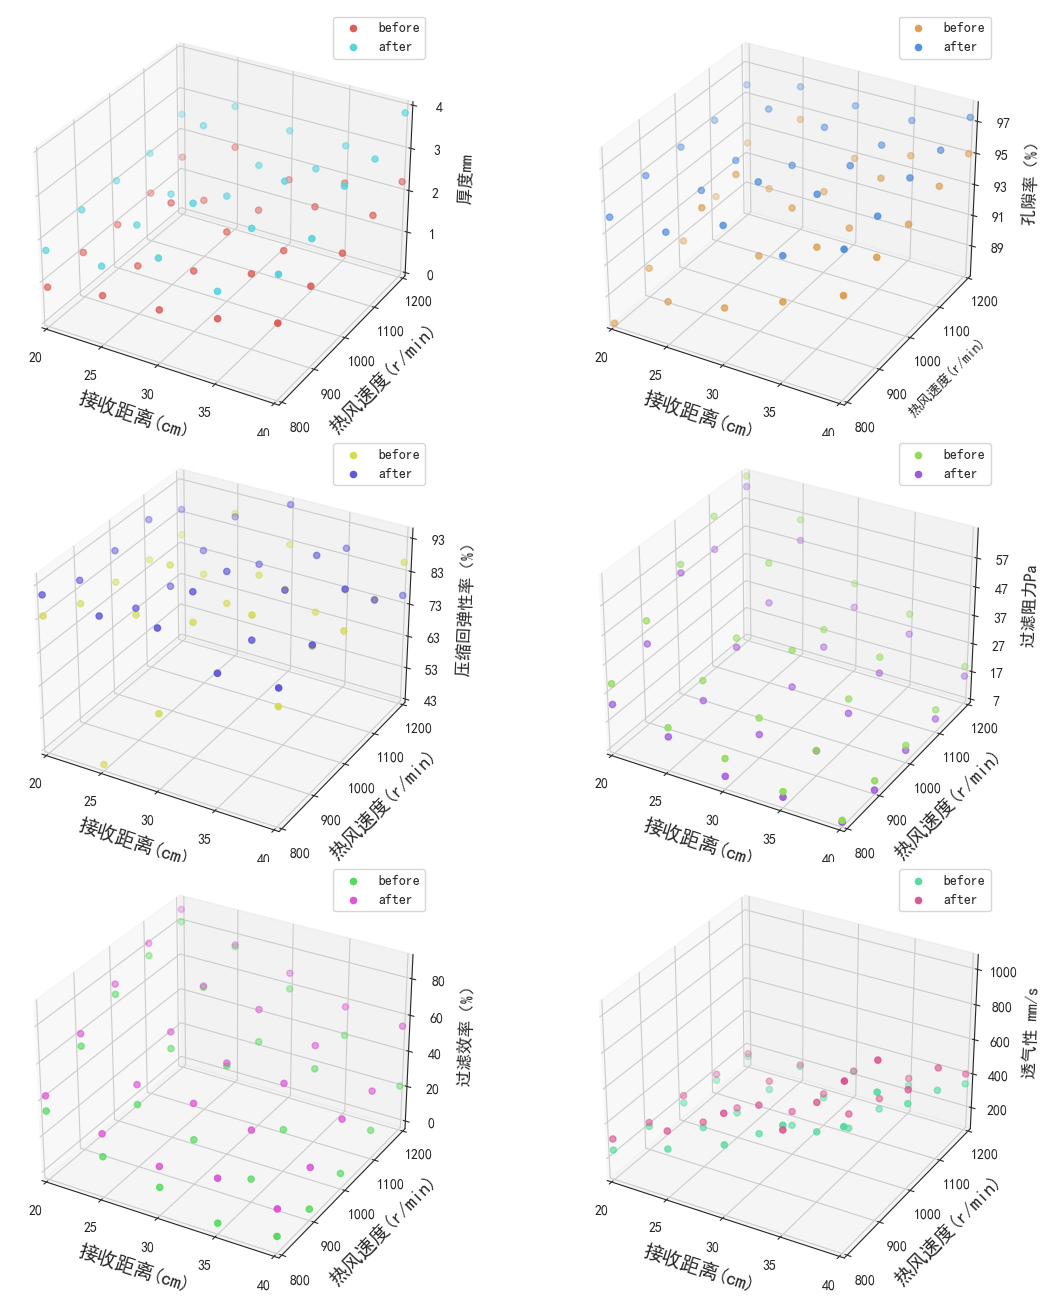

In [18]:
with sns.axes_style("ticks"):
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    fig =plt.figure(figsize=(15, 15), dpi=100)
   
    ax1=fig.add_subplot(321, projection='3d')
    ax1.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['厚度mm'], label="before",color=sns.color_palette("hls",12)[0])
    ax1.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['厚度mm'], label="after",color=sns.color_palette("hls",12)[6])
    ax1.set_xlim(20,40)
    ax1.set_ylim(800,1200)
    ax1.set_zlim(0.87,4)
    ax1.set_xticks( range(20,45,5),fontsize=24 )
    ax1.set_yticks(range(800,1250,100) )
    ax1.set_zticks(range(0,5) )
    ax1.set_zlabel(' 厚度mm', fontsize=12)
    ax1.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14)
    ax1.set_xlabel('接收距离(cm)',rotation=60,fontsize=14)
    ax1.legend()

    ax2 =fig.add_subplot(322, projection='3d')
    ax2.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['孔隙率（%）'], label="before",color=sns.color_palette("hls",12)[1])
    ax2.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['孔隙率（%）'], label="after",color=sns.color_palette("hls",12)[7])
    ax2.set_xlim(20,40)
    ax2.set_ylim(800,1200)
    ax2.set_zlim(87.23,98)
    ax2.set_xticks(range(20,45,5),fontsize=24 )
    ax2.set_yticks(range(800,1250,100))
    ax2.set_zticks(range(89,98,2))
    ax2.set_zlabel(' 孔隙率（%）',fontsize=12)
    ax2.set_ylabel('热风速度(r/min)',rotation=60)
    ax2.set_xlabel('接收距离(cm)',rotation=60,fontsize=14)
    ax2.legend()
    
    ax3 =fig.add_subplot(323, projection='3d')
    ax3.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['压缩回弹性率（%）'], label="before",color=sns.color_palette("hls",12)[2])
    ax3.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['压缩回弹性率（%）'], label="after",color=sns.color_palette("hls",12)[8])
    ax3.set_xlim(20,40)
    ax3.set_ylim(800,1200)
    ax3.set_zlim(43.91,95)
    ax3.set_xticks( range(20,45,5),fontsize=24 )
    ax3.set_yticks(range(800,1250,100),rotation=90 )
    ax3.set_zticks( range(43,95,10),fontsize=24 )
    ax3.set_zlabel(' 压缩回弹性率（%）',fontsize=12,)
    ax3.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14)
    ax3.set_xlabel('接收距离(cm)',rotation=60,fontsize=14)
    ax3.legend()
    
    ax4 =fig.add_subplot(324, projection='3d')
    ax4.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['过滤阻力Pa'], label="before",color=sns.color_palette("hls",12)[3])
    ax4.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['过滤阻力Pa'], label="after",color=sns.color_palette("hls",12)[9])
    ax4.set_xlim(20,40)
    ax4.set_ylim(800,1200)
    ax4.set_zlim(7.2,66)
    ax4.set_xticks(range(20,41,5),fontsize=24 )
    ax4.set_yticks(range(800,1201,100),rotation=90 )
    ax4.set_zticks(range(7,66,10),fontsize=24 )
    
    ax4.set_zlabel(' 过滤阻力Pa',fontsize=12)
    ax4.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14)
    ax4.set_xlabel('接收距离(cm)',rotation=60,fontsize=14) 
    ax4.legend()
    
    ax5 = ax1=fig.add_subplot(325, projection='3d')
    ax5.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['过滤效率（%）'], label="before",color=sns.color_palette("hls",12)[4])
    ax5.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['过滤效率（%）'], label="after",color=sns.color_palette("hls",12)[10])
    ax5.set_xlim(20,40)
    ax5.set_ylim(800,1200)
    ax5.set_xticks(range(20,45,5),fontsize=24 )
    ax5.set_yticks(range(800,1250,100),rotation=90 )
    ax5.set_zlabel(' 过滤效率（%）',fontsize=12)
    ax5.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14)
    ax5.set_xlabel('接收距离(cm)',rotation=60,fontsize=14)
    ax5.legend()
    
    ax6 =fig.add_subplot(326, projection='3d')
    ax6.scatter(before['接收距离(cm)'],before['热风速度(r/min)'], before['透气性 mm/s'], label="before",color=sns.color_palette("hls",12)[5])
    ax6.scatter(after['接收距离(cm)'],after['热风速度(r/min)'], after['透气性 mm/s'], label="after",color=sns.color_palette("hls",12)[11]) 
    ax6.set_xlim(20,40)
    ax6.set_ylim(800,1200)
    ax6.set_xticks(range(20,41,5),fontsize=24 )
    ax6.set_yticks(range(800,1201,100),rotation=90 )
    ax6.set_zlabel(' 透气性 mm/s',fontsize=12)
    ax6.set_ylabel('热风速度(r/min)',rotation=60,fontsize=14)
    ax6.set_xlabel('接收距离(cm)',rotation=60,fontsize=14)
    ax6.legend()
    
    plt.subplots_adjust(left=0.15, right=0.9, bottom=0.05, top=0.9,wspace=0.01, hspace=0.01)
    plt.savefig(r"C:\Users\Administrator\Desktop\1.png")
    plt.show()

### 定量分析

#### 生成变化表及变化百分比表

In [19]:
diff = pd.concat([pd.DataFrame(np.array(after.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25))
                 -pd.DataFrame(np.array(before.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25)), 
                 pd.DataFrame(np.array(after.iloc[:, 7: 10]),columns=["热风速度(r/min)", "接收距离(cm)", "插层率（%）"],index=range(0,25))], axis=1)
diff.head(5)

,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
0,1.095,2.76,5.36,-0.597,15.000,242.57,800.0,40.0,36.44
1,1.080,2.48,0.42,-3.270,23.034,173.06,900.0,40.0,24.74
2,1.535,2.83,12.21,-1.737,30.300,78.47,1000.0,40.0,31.45
3,1.305,2.23,-0.13,-3.300,22.133,128.67,1100.0,40.0,19.37
4,1.610,2.27,-10.07,-3.530,33.733,58.60,1200.0,40.0,31.19


In [20]:
per=pd.DataFrame(np.array(after.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25))/pd.DataFrame(np.array(before.iloc[:, 1: 7]),columns=["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"],index=range(0,25))-1
per*=100
diff_ave = pd.concat([per, 
                 pd.DataFrame(np.array(after.iloc[:, 7: 10]),columns=["热风速度(r/min)", "接收距离(cm)", "插层率（%）"],index=range(0,25))], axis=1)
diff_ave.head(5)

,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
0,63.848397,2.951240,6.885920,-7.343173,301.993155,31.214773,800.0,40.0,36.44
1,59.016393,2.640264,0.487069,-31.232092,1191.619245,21.752957,900.0,40.0,24.74
2,81.216931,3.006800,14.868485,-14.633530,704.651163,13.890216,1000.0,40.0,31.45
3,62.291169,2.354805,-0.156608,-23.741007,188.093822,27.116965,1100.0,40.0,19.37
4,72.035794,2.388719,-11.703859,-18.356734,162.435595,16.876422,1200.0,40.0,31.19


#### 变化的均值

In [21]:
diff.mean(),diff_ave.mean()

(厚度mm              1.08860
 孔隙率（%）            3.51200
 压缩回弹性率（%）         7.18120
 过滤阻力Pa           -5.62708
 过滤效率（%）          14.39464
 透气性 mm/s         74.53040
 热风速度(r/min)    1000.00000
 接收距离(cm)         30.00000
 插层率（%）           23.03560
 dtype: float64,
 厚度mm             75.671673
 孔隙率（%）            3.838945
 压缩回弹性率（%）        11.366790
 过滤阻力Pa          -19.795939
 过滤效率（%）         197.973622
 透气性 mm/s         20.643039
 热风速度(r/min)    1000.000000
 接收距离(cm)         30.000000
 插层率（%）           23.035600
 dtype: float64)

## 问题一（2）

#### 定性分析

In [22]:
diff_ave.sort_values(by=["插层率（%）"], inplace=True, ascending=True) 
diff_ave.index = range(len(diff))
diff_ave.head(5)

,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
0,76.948052,3.653805,14.919208,-22.542910,15.018761,0.488160,1200.0,30.0,2.50
1,52.812500,2.869117,11.854518,-38.721557,3.449035,32.952919,1000.0,30.0,4.84
2,102.136752,5.613260,38.705213,-37.689050,102.061947,36.889624,800.0,30.0,7.63
3,100.000000,7.761091,7.426392,-23.908160,24.508824,26.141636,800.0,20.0,11.32
4,48.907104,2.384755,17.777167,-22.083591,39.506234,17.479373,1200.0,35.0,13.87


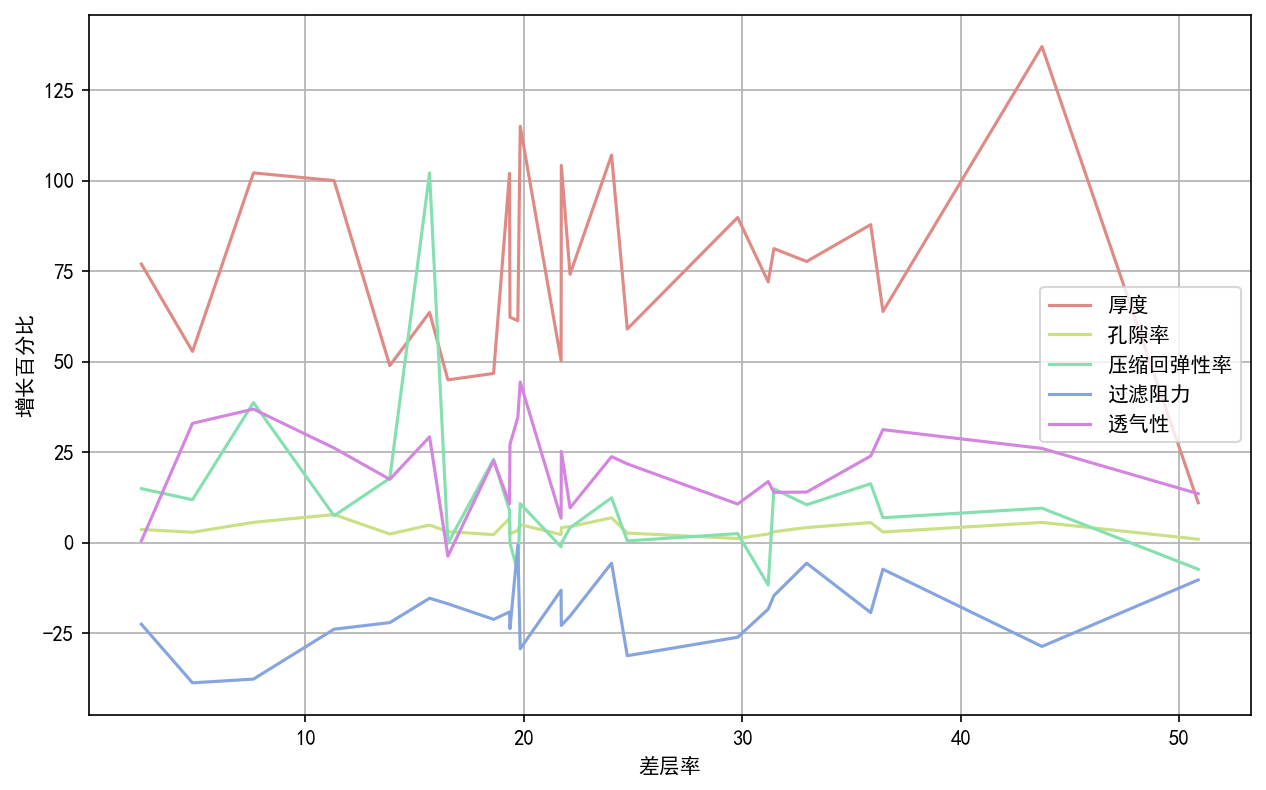

In [25]:
plt.figure(figsize=(10,6.18),dpi=150)
plt.xlabel('差层率')
plt.ylabel('增长百分比')
plt.plot(diff_ave["插层率（%）"], diff_ave["厚度mm"], label="厚度",color=sns.hls_palette(5, l=.7, s=.6)[0])
plt.plot(diff_ave["插层率（%）"], diff_ave["孔隙率（%）"], label="孔隙率",color=sns.hls_palette(5, l=.7, s=.6)[1])
plt.plot(diff_ave["插层率（%）"], diff_ave["压缩回弹性率（%）"], label="压缩回弹性率",color=sns.hls_palette(5, l=.7, s=.6)[2])
plt.plot(diff_ave["插层率（%）"], diff_ave["过滤阻力Pa"], label="过滤阻力",color=sns.hls_palette(5, l=.7, s=.6)[3])
#plt.plot(diff_ave["插层率（%）"], diff_ave["过滤效率（%）"], label="过滤效率")
plt.plot(diff_ave["插层率（%）"], diff_ave["透气性 mm/s"], label="透气性",color=sns.hls_palette(5, l=.7, s=.6)[4])
plt.grid(True)
plt.legend()
plt.savefig(r"C:\Users\Administrator\Desktop\5.png")
plt.show()

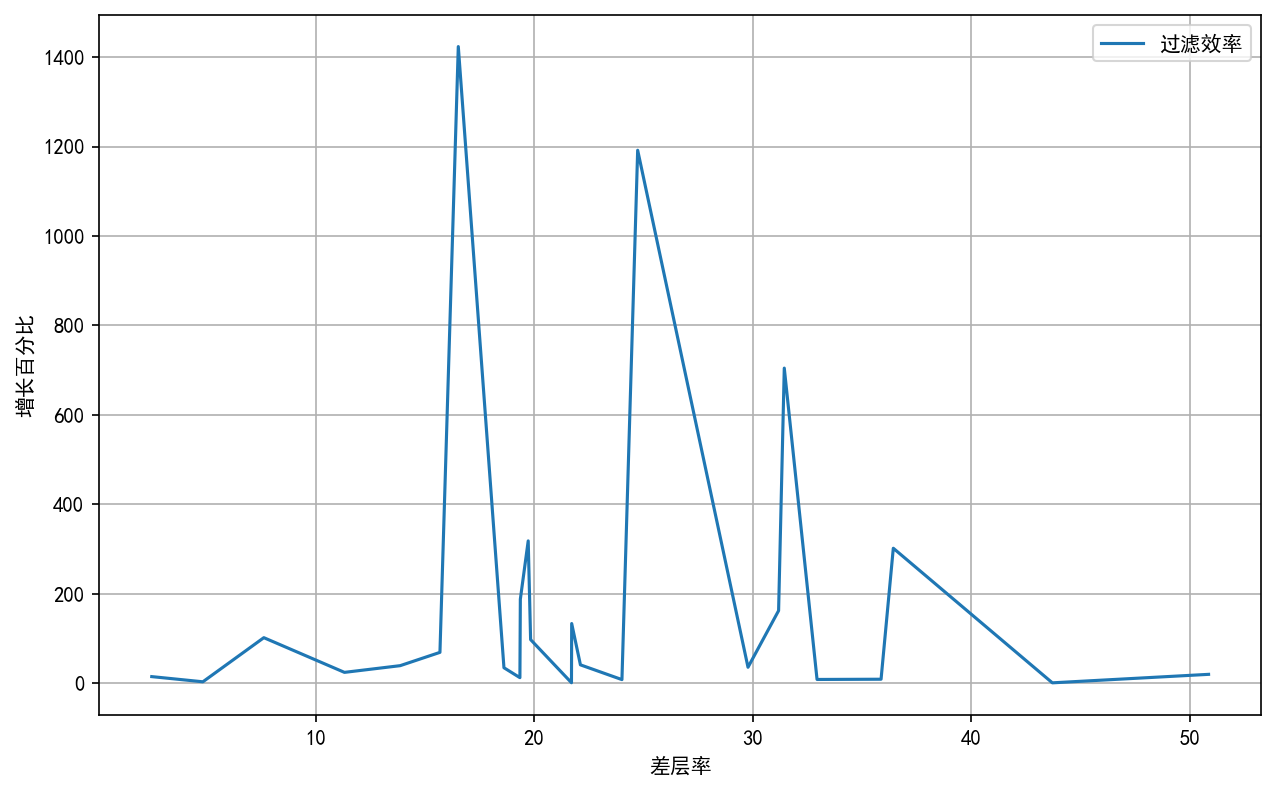

In [26]:
plt.figure(figsize=(10,6.18),dpi=150)
plt.xlabel('差层率')
plt.ylabel('增长百分比')
plt.plot(diff_ave["插层率（%）"], diff_ave["过滤效率（%）"], label="过滤效率")
plt.grid(True)
plt.legend()
plt.savefig(r"C:\Users\Administrator\Desktop\6.png")
plt.show()

In [34]:
diff['']

,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,热风速度(r/min),接收距离(cm),插层率（%）
0,1.095,2.76,5.36,-0.597,15.000,242.57,800.0,40.0,36.44
1,1.080,2.48,0.42,-3.270,23.034,173.06,900.0,40.0,24.74
2,1.535,2.83,12.21,-1.737,30.300,78.47,1000.0,40.0,31.45
3,1.305,2.23,-0.13,-3.300,22.133,128.67,1100.0,40.0,19.37
4,1.610,2.27,-10.07,-3.530,33.733,58.60,1200.0,40.0,31.19
5,0.625,2.81,-0.14,-1.937,24.667,-25.67,800.0,35.0,16.53
6,1.045,3.22,-7.31,-0.103,27.067,165.33,900.0,35.0,19.73
7,1.615,3.87,-0.18,-5.070,25.667,82.27,1000.0,35.0,21.72
8,0.895,2.08,17.12,-5.670,12.967,60.90,1100.0,35.0,18.62
9,0.895,2.24,12.94,-7.133,16.066,42.37,1200.0,35.0,13.87


In [40]:
from statsmodels.stats.diagnostic import acorr_ljungbox 
for i in ["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"]:
    print(acorr_ljungbox(diff_ave[i], lags=1))

    lb_stat  lb_pvalue
1  5.372566   0.020456
    lb_stat  lb_pvalue
1  0.881337   0.347836
   lb_stat  lb_pvalue
1  0.00021   0.988436
    lb_stat  lb_pvalue
1  0.035411   0.850737
    lb_stat  lb_pvalue
1  0.870992   0.350681
    lb_stat  lb_pvalue
1  0.201375   0.653614


#### 定量分析

In [16]:
temp=[]
for i in ["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"]:
    r,p = stats.pearsonr(diff['插层率（%）'], diff[i])
    temp.append([r,p])
temp

[[0.05300024301486956, 0.801341970132016],
 [-0.21579691178991478, 0.30019495331041685],
 [-0.35989043336622245, 0.07721417554640062],
 [0.12583969352455568, 0.5489218934166323],
 [0.010421169600542641, 0.9605691373605627],
 [-0.02711929631687056, 0.897612656281824]]

In [17]:
temp1=[]
for i in ["厚度mm", "孔隙率（%）", "压缩回弹性率（%）", "过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"]:
    r,p = stats.pearsonr(diff_ave['插层率（%）'], diff_ave[i])
    temp1.append([r,p])
temp1

[[-0.021919351359206668, 0.917170956796623],
 [-0.21520705053360759, 0.3015500919088397],
 [-0.29904776636098185, 0.14645644473332642],
 [0.4059818991137052, 0.04404556386305023],
 [-0.0045025588381617035, 0.9829582789179634],
 [-0.06722821814593734, 0.7495040771669138]]

# 问题二

## 数据分析

In [18]:
df3.head(5)

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s
0,40,800,2.766014,96.204429,84.763264,24.756047,48.211693,654.149177
1,40,800,2.754933,95.879200,84.969388,26.008212,51.443315,609.854645
2,40,800,2.756595,95.965270,84.648600,26.222296,49.679948,635.112175
3,40,900,3.051175,96.114384,85.315207,27.167856,48.599384,521.793019
4,40,900,3.051480,96.924714,85.365072,25.323787,45.963814,553.848607


In [19]:
from sklearn.preprocessing import scale

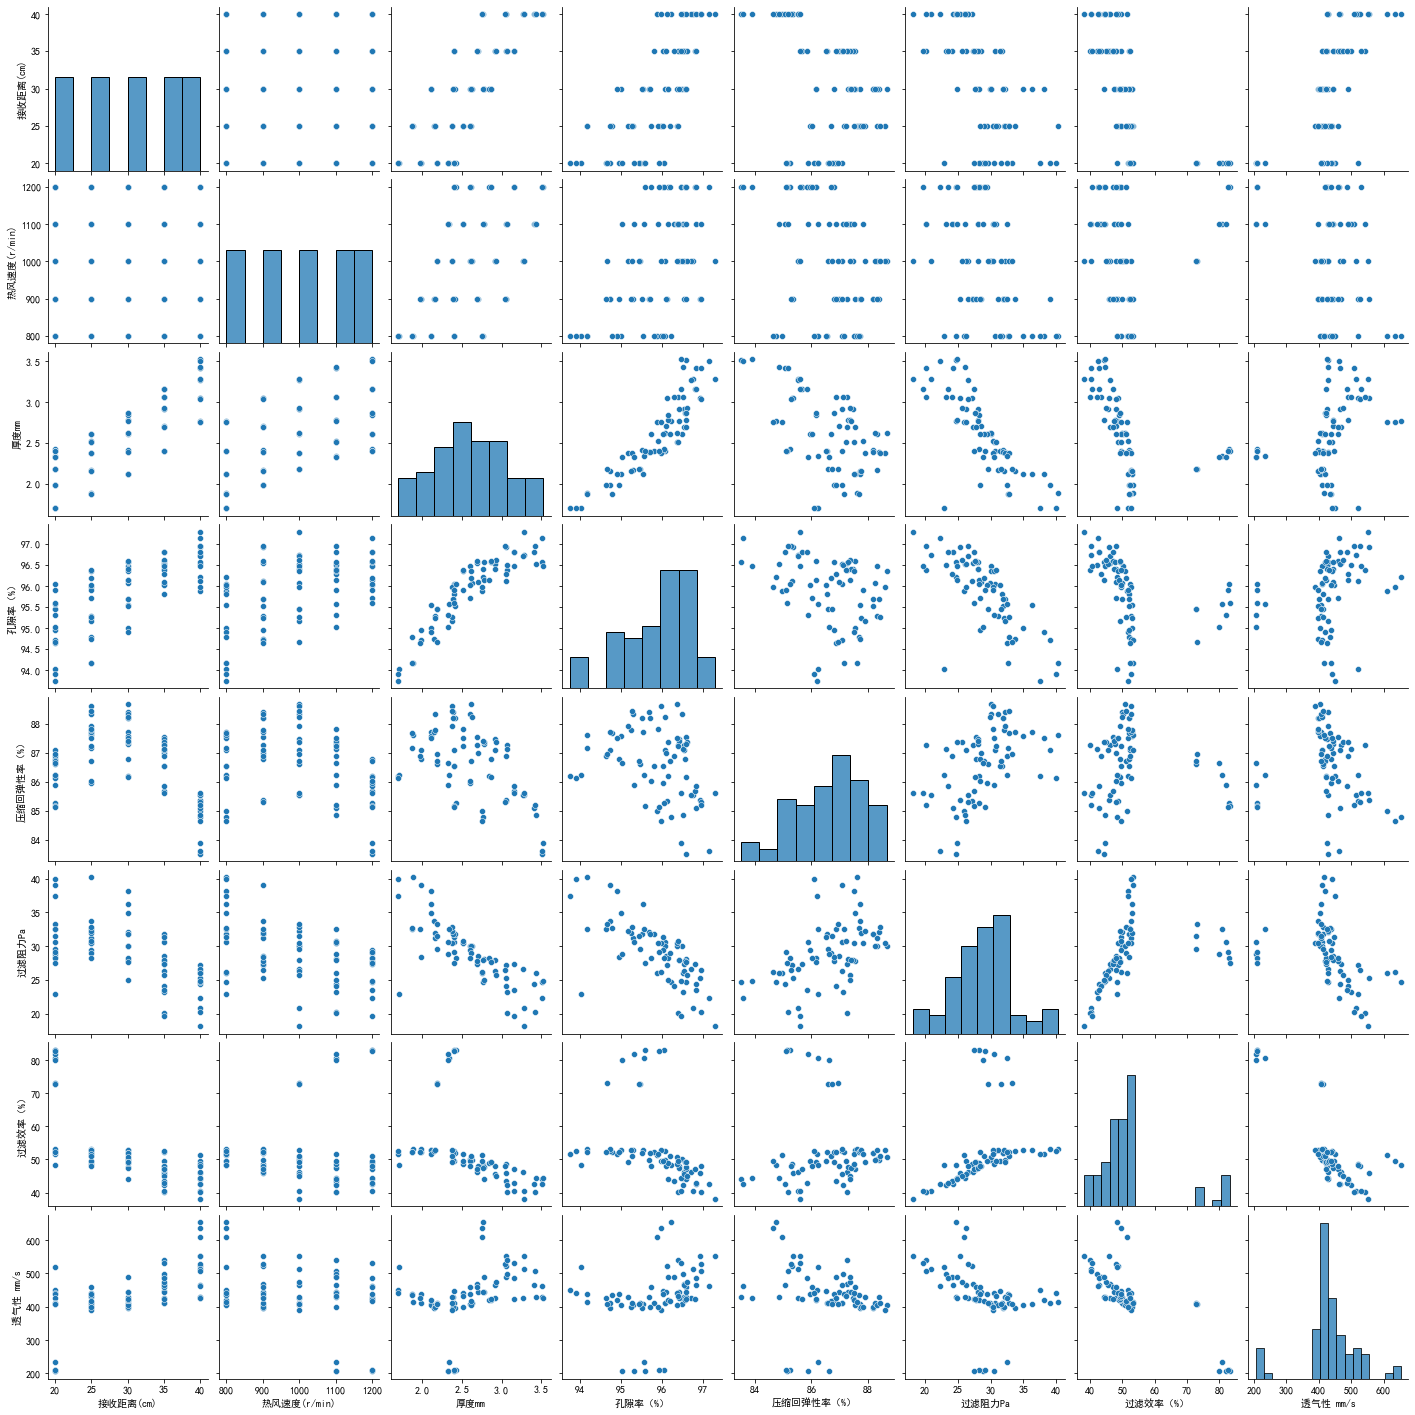

In [20]:
sns.pairplot(df3)

In [21]:
df3.corr()

,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s
接收距离(cm),1.000000e+00,6.396779e-16,0.816890,0.730050,-0.402620,-0.611067,-0.677469,0.636270
热风速度(r/min),6.396779e-16,1.000000e+00,0.555201,0.521922,-0.320321,-0.472472,0.090113,-0.301408
厚度mm,8.168898e-01,5.552010e-01,1.000000,0.896965,-0.527047,-0.795244,-0.482529,0.353674
孔隙率（%）,7.300497e-01,5.219222e-01,0.896965,1.000000,-0.323640,-0.736532,-0.400708,0.278720
压缩回弹性率（%）,-4.026198e-01,-3.203214e-01,-0.527047,-0.323640,1.000000,0.497562,-0.010066,-0.165227
过滤阻力Pa,-6.110671e-01,-4.724723e-01,-0.795244,-0.736532,0.497562,1.000000,0.374042,-0.410408
过滤效率（%）,-6.774692e-01,9.011290e-02,-0.482529,-0.400708,-0.010066,0.374042,1.000000,-0.788960
透气性 mm/s,6.362700e-01,-3.014081e-01,0.353674,0.278720,-0.165227,-0.410408,-0.788960,1.000000


## 神经网络（A-B）

In [14]:
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.net1 = nn.Sequential(nn.Linear(2, 3))
        self.net2 = nn.Sequential(nn.Linear(3, 5))
        self.net3 = nn.Sequential(nn.Linear(5, 4))
        self.net4 = nn.Sequential(nn.Linear(4, 3))
      
        
    def forward(self, x):
        x = self.net1(x)
        x = F.softplus(x)
        x = self.net2(x)
        x = F.softplus(x) 
        x = self.net3(x)
        x = F.softplus(x)    
        x = self.net4(x)
        return x

In [16]:
data = torch.tensor(df3.iloc[:, 0: 2].values, dtype=torch.float)
target = torch.tensor(df3.iloc[:, 2:5].values, dtype=torch.float)
data.shape,target.shape

(torch.Size([75, 2]), torch.Size([75, 3]))

In [17]:
x_train,x_val,y_train,y_val = train_test_split(data,target,test_size=0.2,random_state=20)

train = torch.cat([x_train, y_train], dim=1)
val = torch.cat([x_val, y_val], dim=1)

In [18]:
model1 = Net()
opt = torch.optim.Adam(model1.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

total_test_step = 0

In [19]:
opt = torch.optim.Adam(model1.parameters(), lr=0.01)

In [47]:
model1 = torch.load('model1.pkl')

In [20]:
for i in range(15):
    print(model1(val[i,:2]),val[i,2:])

tensor([ 5.9006, -0.3278,  0.9091], grad_fn=<AddBackward0>) tensor([ 2.3902, 95.6761, 88.3901])
tensor([ 5.2668, -0.2542,  0.8271], grad_fn=<AddBackward0>) tensor([ 1.6996, 93.7387, 86.1905])
tensor([ 7.2130, -0.4810,  1.0792], grad_fn=<AddBackward0>) tensor([ 2.3282, 95.3074, 85.8968])
tensor([ 7.8300, -0.5533,  1.1592], grad_fn=<AddBackward0>) tensor([ 3.5139, 96.5662, 83.5169])
tensor([ 5.2361, -0.2506,  0.8232], grad_fn=<AddBackward0>) tensor([ 2.7660, 96.2044, 84.7633])
tensor([ 5.9083, -0.3287,  0.9101], grad_fn=<AddBackward0>) tensor([ 2.1667, 95.2908, 88.3419])
tensor([ 6.5494, -0.4034,  0.9931], grad_fn=<AddBackward0>) tensor([ 2.6193, 96.3598, 88.6613])
tensor([ 5.8852, -0.3260,  0.9071], grad_fn=<AddBackward0>) tensor([ 3.0450, 96.9437, 85.2809])
tensor([ 7.8530, -0.5560,  1.1622], grad_fn=<AddBackward0>) tensor([ 2.6064, 95.7148, 86.0098])
tensor([ 6.5417, -0.4025,  0.9921], grad_fn=<AddBackward0>) tensor([ 2.9149, 96.5309, 87.0748])
tensor([ 5.2361, -0.2506,  0.8232], grad

In [21]:
less_loss=10000

In [ ]:
losses=[]
for i in range(10):
    opt = torch.optim.Adam(model1.parameters(), lr=0.001)
    loss_func = torch.nn.MSELoss()
    for step in range(1000):
        model1.train()
        for d in train:
            outputs = model1(d[:2])
            loss = loss_func(outputs, d[2:])

            # 优化器模型
            opt.zero_grad()
            loss.backward()
            opt.step()
            model1.eval()
        total_accuracy = 0
        total_test_loss = 0
        with torch.no_grad():
            for da in val:
                output = model1(da[:2])
                loss = loss_func(output, da[2:])
                total_test_loss += loss.item()
                if(step==999):
                    print("预测值： {},真实值：{}".format(output,da[2:]))
            losses.append(total_test_loss)
            if(total_test_loss<less_loss):   
                print("整体验证集上的loss: {}".format(total_test_loss))
                less_loss=total_test_loss
                torch.save(model1, 'model1.pkl')
        total_test_step += 1

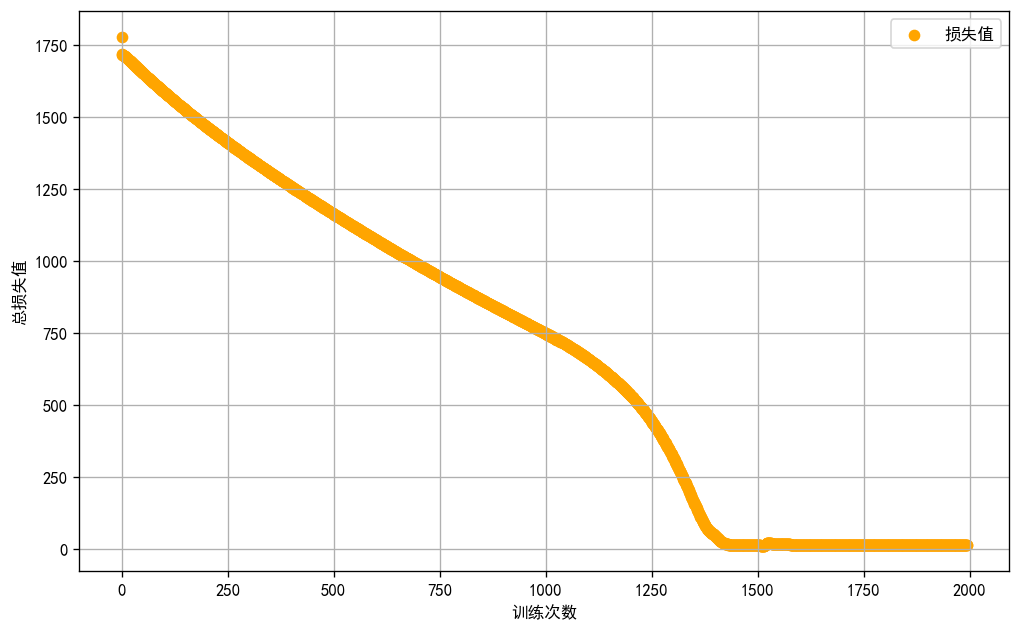

In [57]:
plt.figure(figsize=(10, 6.18), dpi=120)
plt.scatter(range(len(losses[5:2000])),losses[5:2000],label='损失值',color='orange')
plt.xlabel('训练次数')
plt.ylabel('总损失值')
plt.grid(True)
plt.legend()
plt.savefig(r"C:\Users\Administrator\Desktop\13.png")
plt.show()

### 预测值

In [49]:
test=torch.tensor([[38.0,850],[33,950],[28,1150],[23,1250],[38,250],[33,1150],[28,950],[23,850]])

In [50]:
test,len(test)

(tensor([[  38.,  850.],
         [  33.,  950.],
         [  28., 1150.],
         [  23., 1250.],
         [  38.,  250.],
         [  33., 1150.],
         [  28.,  950.],
         [  23.,  850.]]),
 8)

In [51]:
for i in test:
    print(model1(i))

tensor([ 2.6099, 96.0257, 87.0805], grad_fn=<AddBackward0>)
tensor([ 2.5807, 95.9860, 87.1232], grad_fn=<AddBackward0>)
tensor([ 2.7612, 96.2081, 86.8333], grad_fn=<AddBackward0>)
tensor([ 2.7318, 96.1754, 86.8843], grad_fn=<AddBackward0>)
tensor([ 1.4372, 91.0524, 85.0118], grad_fn=<AddBackward0>)
tensor([ 3.0018, 96.4407, 86.3757], grad_fn=<AddBackward0>)
tensor([ 2.3442, 95.5899, 87.3854], grad_fn=<AddBackward0>)
tensor([ 1.9144, 94.2767, 87.1976], grad_fn=<AddBackward0>)


# 问题三

## 问题三（1） 神经网络（B-C）

In [160]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        self.net1 = nn.Sequential(nn.Linear(3, 4))
        self.net2 = nn.Sequential(nn.Linear(4, 5))
        self.net3 = nn.Sequential(nn.Linear(5, 3))
        self.net4 = nn.Sequential(nn.Linear(3, 2))
      
        
    def forward(self, x):
        x = self.net1(x)
        x = F.softplus(x)
        x = self.net2(x)
        x = F.softplus(x) 
        x = self.net3(x)
        x = F.softplus(x)    
        x = self.net4(x)
        return x

In [161]:
data2 = torch.tensor(df3.iloc[:, 2: 5].values, dtype=torch.float)
target2 = torch.tensor(df3.iloc[:, 5: 7].values, dtype=torch.float)

In [162]:
x_train,x_val,y_train,y_val = train_test_split(data2,target2,
                                               test_size=0.2,random_state=1)
train = torch.cat([x_train, y_train], dim=1)
val = torch.cat([x_val, y_val], dim=1)


In [173]:
less_loss = 100000000

In [204]:
model2 = torch.load('model2.pkl')
#model2=Net2()
opt = torch.optim.Adam(model2.parameters(), lr=0.000000000000000001)
loss_func = torch.nn.MSELoss()

In [ ]:
for i in range(10):
    for step in range(1000):
        model2.train()
        for d in train:
            outputs = model2(d[:3])
            loss = loss_func(outputs, d[3:])

            # 优化器模型
            opt.zero_grad()
            loss.backward()
            opt.step()
            model2.eval()
        total_accuracy = 0
        total_test_loss = 0
        with torch.no_grad():
            for da in val:
                output = model2(da[:3])
                loss = loss_func(output, da[3:])
                total_test_loss += loss.item()
                if(step%300==0):
                    print("预测值： {},真实值：{}".format(output,da[3:]))
            if(total_test_loss<less_loss):   
                print("整体验证集上的loss: {}".format(total_test_loss))
                less_loss=total_test_loss
                torch.save(model2, 'model2.pkl')

In [ ]:
for i in train:
    print(model2(i[:3]),i[3:])

### 生成数据并计算

In [15]:
x=np.linspace(15,120,4251)
y=np.linspace(100,2500,1451)

In [16]:
combinations = np.array(np.meshgrid(x, y)).T.reshape(-1,2)

In [17]:
combinations.shape

(6168201, 2)

In [21]:
data=torch.tensor(combinations).to (torch. float32)

In [26]:
temp=model2(model1(data))[:,[1]]

In [27]:
temp.shape

torch.Size([6168201, 1])

In [208]:
model1(torch.tensor([20,1200]).to (torch. float32))

tensor([ 2.4842, 95.8421, 87.2500], grad_fn=<AddBackward0>)

## 问题三（2） 结构变量之间关系

### 相关性系数矩阵

In [38]:
struct=df3[["厚度mm", "孔隙率（%）", "压缩回弹性率（%）"]]
effect=df3[["过滤阻力Pa", "过滤效率（%）", "透气性 mm/s"]]

In [39]:
struct.corr()

,厚度mm,孔隙率（%）,压缩回弹性率（%）
厚度mm,1.000000,0.896965,-0.527047
孔隙率（%）,0.896965,1.000000,-0.323640
压缩回弹性率（%）,-0.527047,-0.323640,1.000000


In [40]:
effect.corr()

,过滤阻力Pa,过滤效率（%）,透气性 mm/s
过滤阻力Pa,1.000000,0.374042,-0.410408
过滤效率（%）,0.374042,1.000000,-0.788960
透气性 mm/s,-0.410408,-0.788960,1.000000


### 典型相关分析

In [41]:
from sklearn.cross_decomposition import CCA

In [42]:
# 建立模型
cca = CCA(n_components=1)
#如果想计算第二主成分对应的相关系数cca = CCA(n_components=2)
# 训练数据
cca.fit(struct, effect)
# 降维操作
# print(X)
X_train_r, Y_train_r = cca.transform(struct, effect)
# print(X_train_r)
print(np.corrcoef(X_train_r[:, 0], Y_train_r[:, 0])[0, 1]) #输出相关系数
#如果想计算第二主成分对应的相关系数 print(np.corrcoef(X_train_r[:, 1], Y_train_r[:, 1])[0, 1])

0.8443444949551087


In [43]:
cca.x_weights_

array([[ 0.98982982],
       [-0.01829998],
       [ 0.14107456]])

In [44]:
cca.y_weights_

array([[-0.74260915],
       [-0.55297808],
       [-0.37781859]])

### 线性回归

In [45]:
from sklearn.linear_model import LinearRegression  as LR

In [46]:
lr=LR()
lr.fit(struct[[ "孔隙率（%）", "压缩回弹性率（%）"]],struct["厚度mm"])
print(lr.coef_,lr.intercept_)

[ 0.46714402 -0.10264124] -33.292759149513344


In [47]:
lr=LR()
lr.fit(effect[["过滤阻力Pa", "透气性 mm/s"]],effect[ "过滤效率（%）"])
print(lr.coef_,lr.intercept_)

[ 0.14145629 -0.09648271] 89.78206446633436
